In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('diamonds.csv',index_col=0)

In [3]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53940 entries, 1 to 53940
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


In [5]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [6]:
df.corr().price.sort_values(ascending=False)

price    1.000000
carat    0.921591
x        0.884435
y        0.865421
z        0.861249
table    0.127134
depth   -0.010647
Name: price, dtype: float64

<Axes: >

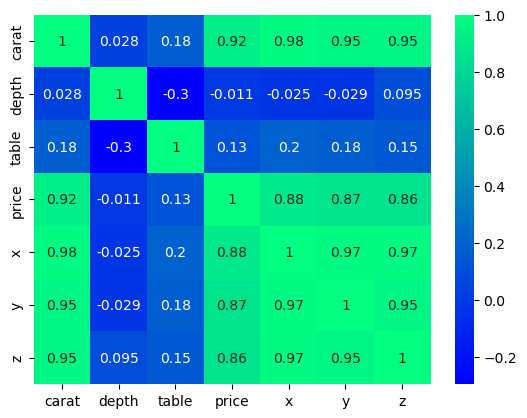

In [7]:
sns.heatmap(df.corr(),annot=True,cmap='winter')

<Axes: >

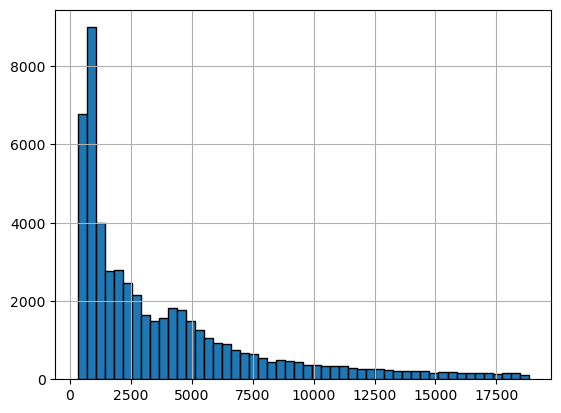

In [8]:
df['price'].hist(bins=50,edgecolor='black')

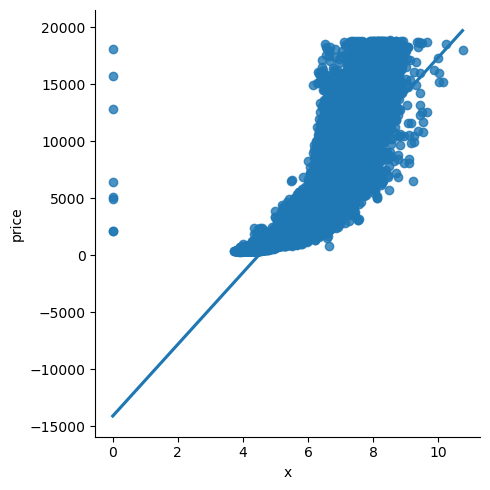

In [10]:
sns.lmplot(data=df,x='x',y='price')

<Axes: xlabel='cut', ylabel='count'>

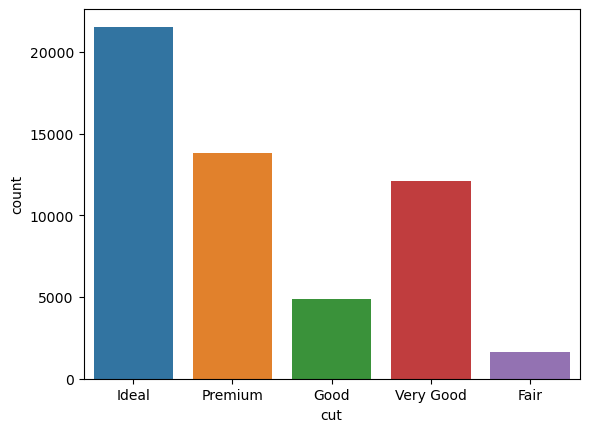

In [11]:
sns.countplot(data=df,x='cut',)

<Axes: xlabel='color', ylabel='count'>

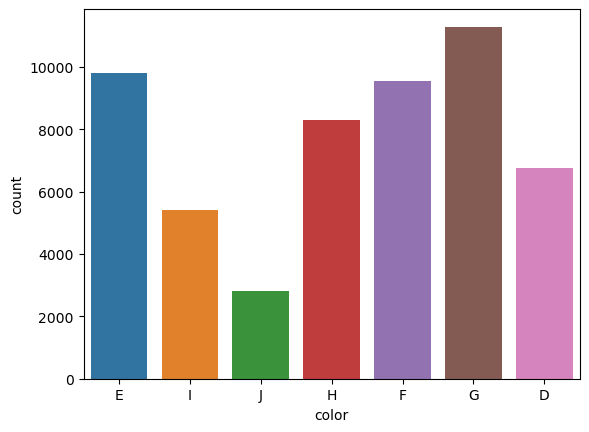

In [12]:
sns.countplot(data=df,x='color',)

In [13]:
df1=pd.get_dummies(df['cut'],drop_first=True)
df2=pd.get_dummies(df['clarity'],drop_first=True)
df3=pd.get_dummies(df['color'],drop_first=True)

In [14]:
df=df.join(df1)

In [15]:
df=df.join(df2)

In [16]:
df=df.join(df3)

In [17]:
df.drop(['cut','color','clarity'],axis=1,inplace=True)

In [18]:
df.columns

Index(['carat', 'depth', 'table', 'price', 'x', 'y', 'z', 'Good', 'Ideal',
       'Premium', 'Very Good', 'IF', 'SI1', 'SI2', 'VS1', 'VS2', 'VVS1',
       'VVS2', 'E', 'F', 'G', 'H', 'I', 'J'],
      dtype='object')

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X=df.drop('price',axis=1)
y=df['price']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
model=LinearRegression()

In [24]:
model.fit(X_train,y_train)

LinearRegression()

In [25]:
pred=model.predict(X_test)

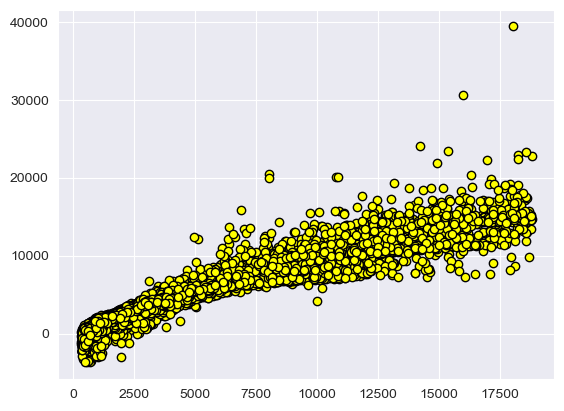

In [26]:
sns.set_style('darkgrid')
plt.scatter(y_test,pred,edgecolors='black',color='yellow')

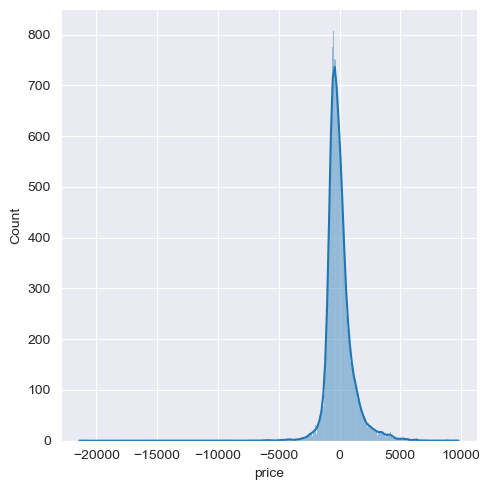

In [27]:
sns.displot(y_test-pred,kde=True)

In [28]:
from sklearn import metrics

In [29]:
metrics.mean_absolute_error(y_test,pred)

732.6487926525242

In [30]:
metrics.mean_squared_error(y_test,pred)

1266353.9680533796

In [31]:
np.sqrt(metrics.mean_squared_error(y_test,pred))

1125.3239391630214

In [32]:
np.mean(df['price'])

3932.799721913237

<Axes: xlabel='price'>

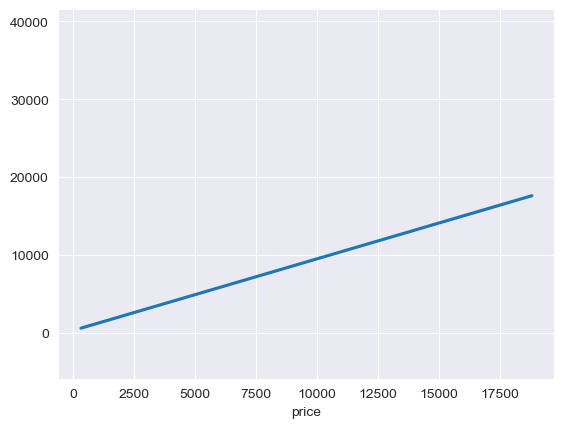

In [33]:
sns.regplot(x=y_test,y=pred,marker=' ')

In [34]:
model.intercept_

1680.8577938498884

In [35]:
model.coef_

array([11287.37758809,   -56.50966348,   -25.36432022,  -954.82488977,
          26.60694042,  -187.44691904,   582.15558883,   847.48262739,
         772.79295027,   739.5169757 ,  5350.53364783,  3695.49706323,
        2726.98549993,  4601.07787646,  4295.22937893,  5026.19366799,
        4974.79904622,  -201.78217446,  -252.49846106,  -466.76776935,
        -971.99578969, -1436.74230705, -2351.52118699])

In [36]:
metrics.r2_score(y_test,pred)

0.9186877270262674

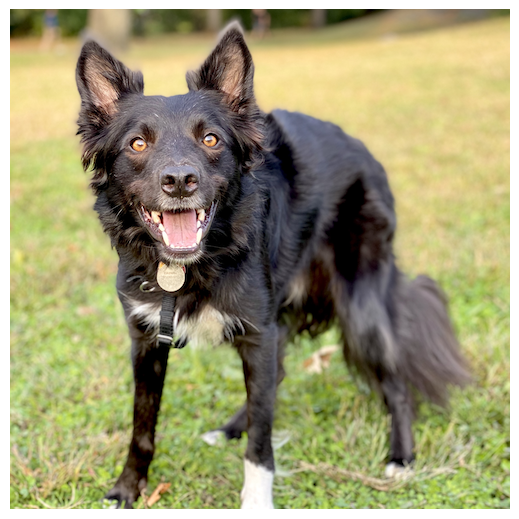